In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import r2_score

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import category_encoders as ce

In [4]:
df= pd.read_csv('energy_task.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [7]:
df.isna().sum()

date           109
Appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
Press_mm_hg    128
RH_out         101
Windspeed        0
Visibility      10
Tdewpoint        0
dtype: int64

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19569.000000,19735.000000,19735.000000,19735.000000,19654.000000,...,19613.000000,19735.000000,19651.000000,19732.000000,19539.000000,19607.000000,19634.000000,19735.000000,19725.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.416943,22.267611,39.242500,20.855335,39.023931,...,22.030801,42.936165,19.486594,41.553061,7.414858,755.521144,79.748120,4.039752,38.331128,3.760995
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.075261,2.006111,3.254576,2.042884,4.340201,...,1.955828,5.224361,2.015256,4.151421,5.316895,7.405769,14.900566,2.451221,11.792933,4.195248
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.890000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.900000,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.105556,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.145000,...,23.390000,46.536000,20.600000,44.343393,10.400000,760.950000,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [9]:
df.duplicated().sum()

0

In [10]:
df['date']=df['date'].fillna('01-01-2000 00:00')
df['date']

0        11-01-2016 17:00
1        11-01-2016 17:10
2        11-01-2016 17:20
3        11-01-2016 17:30
4        11-01-2016 17:40
               ...       
19730    27-05-2016 17:20
19731    27-05-2016 17:30
19732    27-05-2016 17:40
19733    27-05-2016 17:50
19734    27-05-2016 18:00
Name: date, Length: 19735, dtype: object

In [11]:
list1=['RH_2', 'RH_4','RH_5','RH_6','T7','T8','T9','RH_9','T_out','Press_mm_hg','RH_out','Visibility']
for i in list1:
    df[i]=df[i].map(lambda y: np.random.uniform(((df[i].min()).round()), ((df[i].max()).round()) if pd.isna(y) else y))


In [12]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

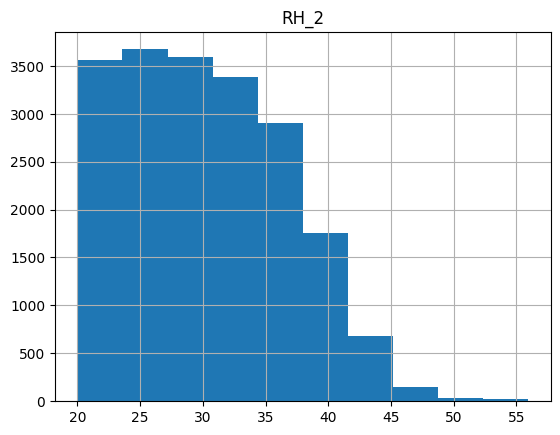

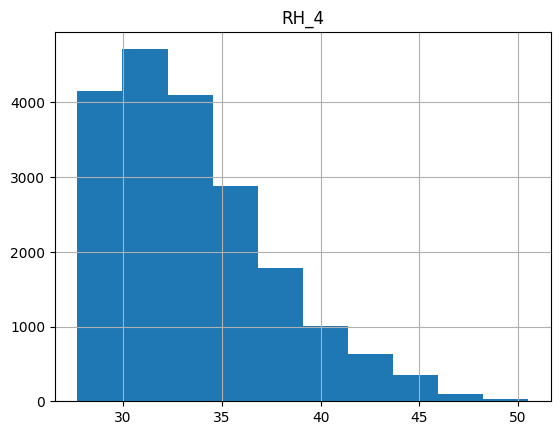

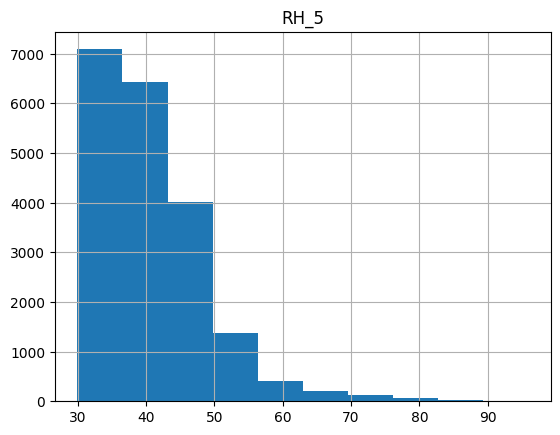

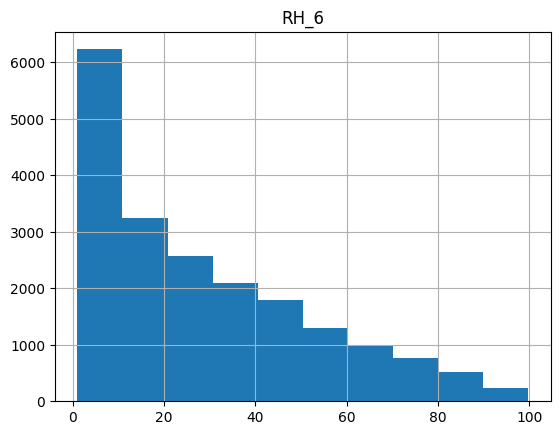

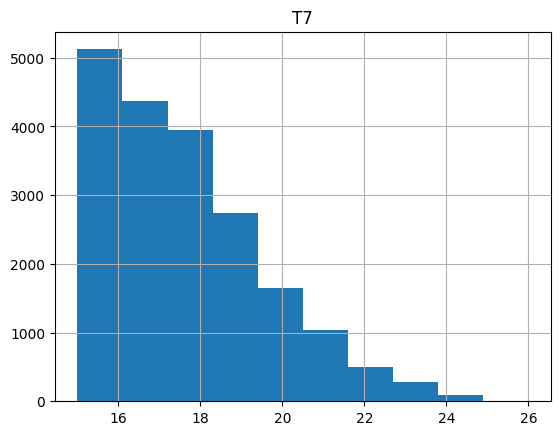

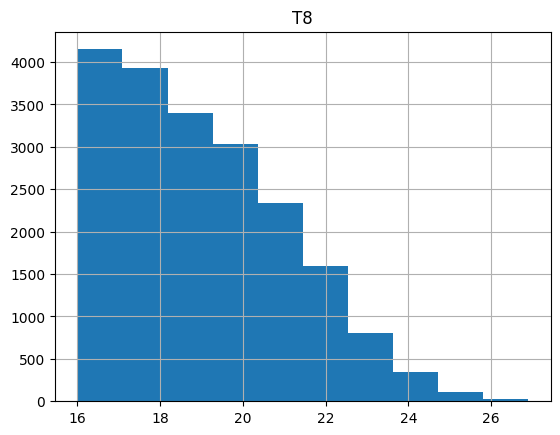

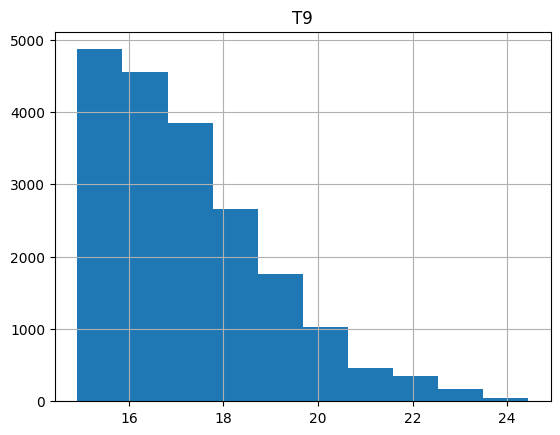

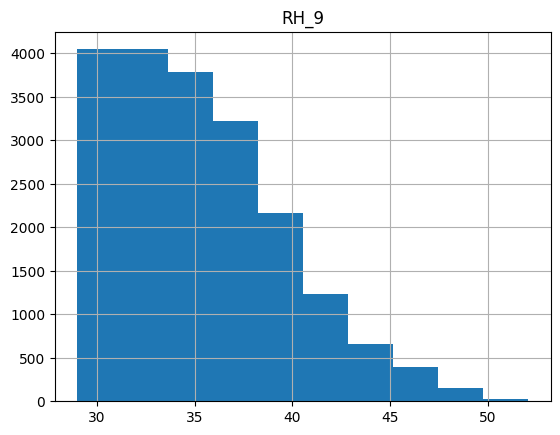

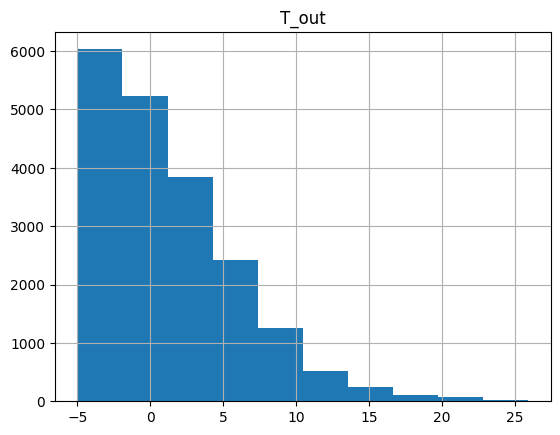

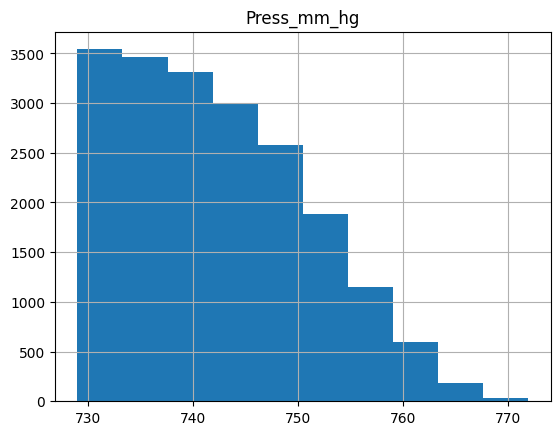

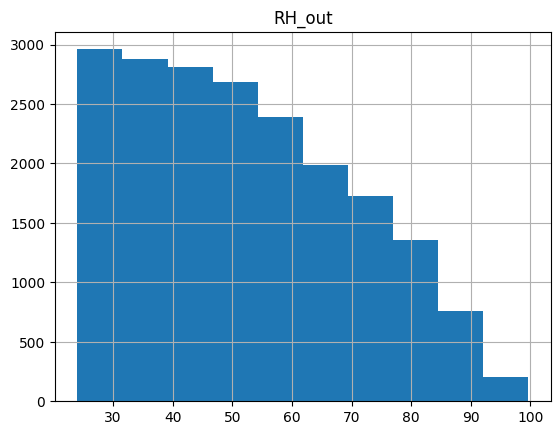

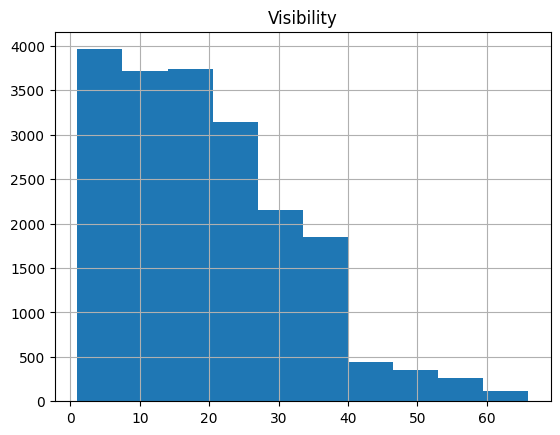

In [14]:
df.describe()[['RH_2', 'RH_4','RH_5','RH_6','T7','T8','T9','RH_9','T_out','Press_mm_hg','RH_out','Visibility']]
columns = ['RH_2', 'RH_4','RH_5','RH_6','T7','T8','T9','RH_9','T_out','Press_mm_hg','RH_out','Visibility']

for column in columns:
    df.hist(column)

In [15]:
list1=['Press_mm_hg','Visibility']
for i in list1:
    df[i] = df[i].astype(int)

In [16]:
outlier = df[['RH_2', 'RH_4','RH_5','RH_6','T7','T8','T9','RH_9','T_out','Press_mm_hg','RH_out','Visibility']]
outlier

,RH_2,RH_4,RH_5,RH_6,T7,T8,T9,RH_9,T_out,Press_mm_hg,RH_out,Visibility
0,38.603935,36.233724,47.898215,25.465646,17.110248,16.080954,15.820265,44.434148,2.777872,732,51.445083,17
1,43.643251,38.502995,39.675135,80.724799,17.179627,17.747687,16.684777,39.820131,4.727760,732,68.032383,18
2,30.311681,43.187250,42.160107,25.959417,15.266261,17.371633,16.249591,32.479906,-2.299718,730,41.081474,23
3,34.421561,41.431393,47.124058,80.013411,15.153146,16.363587,16.848545,29.334343,-1.924844,729,68.244635,47
4,20.083021,36.597925,39.014644,41.731218,16.504429,17.321458,15.444720,30.126402,2.367195,731,48.129482,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19730,36.314535,41.114890,51.400575,1.000000,17.279819,17.340362,18.135595,35.753473,20.583524,729,25.832055,11
19731,34.879974,30.984032,31.639312,1.000000,20.639482,17.871138,18.130723,34.541663,12.247906,730,39.943308,6
19732,29.011888,36.741137,38.268712,1.000000,20.181842,17.630788,22.430868,41.160269,-1.924631,738,46.172309,25
19733,32.179387,39.205059,30.789010,1.000000,19.726248,18.633608,22.473315,29.631969,-3.930657,736,52.604993,13


In [17]:
Q1 = outlier.quantile(0.25)
Q1

RH_2            24.962493
RH_4            30.328390
RH_5            34.523140
RH_6             7.532339
T7              16.059521
T8              17.296751
T9              15.879827
RH_9            31.843151
T_out           -2.513797
Press_mm_hg    734.000000
RH_out          36.714190
Visibility       9.000000
Name: 0.25, dtype: float64

In [18]:
Q3 = outlier.quantile(0.75)
Q3

RH_2            35.062124
RH_4            35.889199
RH_5            44.723798
RH_6            43.962383
T7              18.770144
T8              20.481634
T9              18.269194
RH_9            37.977890
T_out            4.005111
Press_mm_hg    748.000000
RH_out          65.793492
Visibility      27.000000
Name: 0.75, dtype: float64

In [19]:
IQR = Q3-Q1
IQR

RH_2           10.099631
RH_4            5.560809
RH_5           10.200658
RH_6           36.430044
T7              2.710623
T8              3.184882
T9              2.389368
RH_9            6.134739
T_out           6.518908
Press_mm_hg    14.000000
RH_out         29.079302
Visibility     18.000000
dtype: float64

In [20]:
data = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,RH_2,RH_4,RH_5,RH_6,T7,T8,T9,RH_9,T_out,Press_mm_hg,RH_out,Visibility
0,38.603935,36.233724,47.898215,25.465646,17.110248,16.080954,15.820265,44.434148,2.777872,732,51.445083,17
1,43.643251,38.502995,39.675135,80.724799,17.179627,17.747687,16.684777,39.820131,4.727760,732,68.032383,18
2,30.311681,43.187250,42.160107,25.959417,15.266261,17.371633,16.249591,32.479906,-2.299718,730,41.081474,23
3,34.421561,41.431393,47.124058,80.013411,15.153146,16.363587,16.848545,29.334343,-1.924844,729,68.244635,47
4,20.083021,36.597925,39.014644,41.731218,16.504429,17.321458,15.444720,30.126402,2.367195,731,48.129482,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19725,28.569205,33.992268,38.298587,1.000000,17.246109,19.974665,18.008133,32.350307,1.533784,747,53.213422,7
19726,36.456219,37.509412,30.045412,1.000000,17.160512,21.390678,19.851856,34.149444,11.835887,735,28.095358,22
19728,24.103514,37.416883,47.342774,1.000000,22.168289,19.971644,20.822753,42.207954,-3.049630,744,24.894603,2
19729,35.480592,38.194253,46.837973,1.000000,15.745978,16.489073,15.548972,43.712013,5.812053,748,34.339726,21


In [21]:
index_list = list(data.index.values)

In [22]:
data = df[df.index.isin(index_list)]
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,38.603935,19.79,44.730000,19.000000,...,16.080954,48.900000,15.820265,44.434148,2.777872,732,51.445083,7.000000,17,5.3
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,43.643251,19.79,44.790000,19.000000,...,17.747687,48.863333,16.684777,39.820131,4.727760,732,68.032383,6.666667,18,5.2
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,30.311681,19.79,44.933333,18.926667,...,17.371633,48.730000,16.249591,32.479906,-2.299718,730,41.081474,6.333333,23,5.1
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,34.421561,19.79,45.000000,18.890000,...,16.363587,48.590000,16.848545,29.334343,-1.924844,729,68.244635,6.000000,47,5.0
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,20.083021,19.79,45.000000,18.890000,...,17.321458,48.590000,15.444720,30.126402,2.367195,731,48.129482,5.666667,2,4.9


In [23]:
data.pop('date')
Y = data['Appliances']
X = data.drop('Appliances', axis=1) # becareful inplace= False

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((13855, 25), (3464, 25))

In [24]:
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
y_hat = Tree_regressor.predict(X_train)
r2_score(y_train, y_hat)

1.0

In [26]:
y_pred = Tree_regressor.predict(X_test)
r2_score(y_test, y_pred)

-0.11083628934186951

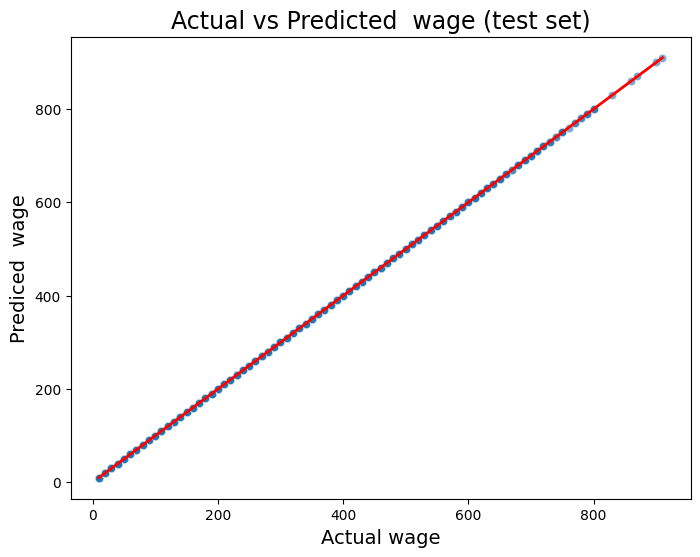

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_train, y=y_hat, alpha=0.6)
sns.lineplot(x=y_train, y=y_train, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

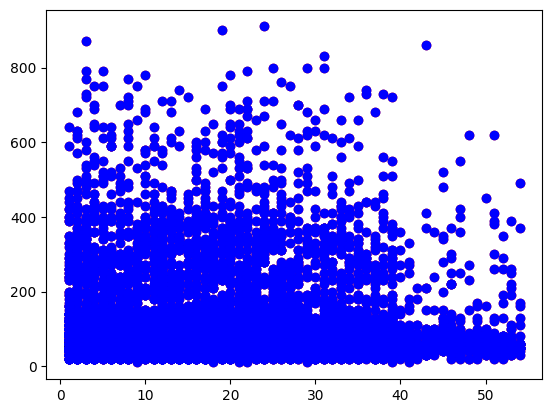

In [28]:
fig, ax = plt.subplots()
ax.scatter(X_train['Visibility'],y_train, color = "red")

ax.scatter(X_train['Visibility'],y_hat, color = "blue")

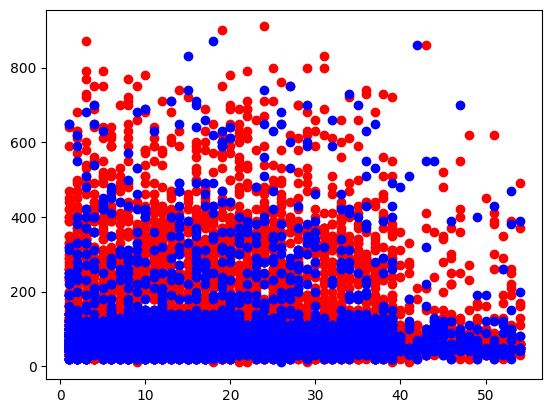

In [29]:
fig, ax = plt.subplots()
ax.scatter(X_train['Visibility'],y_train, color = "red")

ax.scatter(X_test['Visibility'],y_pred, color = "blue")

In [30]:
print(f'predict train: {r2_score(y_test, y_pred)}')
print(f'predict test: {r2_score(y_train, y_hat)}')

predict train: -0.11083628934186951
predict test: 1.0


In [31]:
param_grid = {
    'max_depth': [2,3,4, 5],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 4],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ["best", "random"],
    'ccp_alpha': [1, 5, 10, 100, 1000, None]
}


rand_search = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, cv = 10, verbose = 2, scoring='r2',  n_jobs = -1, n_iter=20)
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [1, 5, 10, 100, 1000,
                                                      None],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ['best', 'random']},
                   scoring='r2', verbose=2)

In [32]:
rand_search.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 3,
 'criterion': 'friedman_mse',
 'ccp_alpha': 10}

In [33]:
y_pred_train_optimized = rand_search.predict(X_train)
r2_score(y_train, y_pred_train_optimized)

0.0867465354621556

In [34]:
y_pred_optimized = rand_search.predict(X_test)
r2_score(y_test, y_pred_optimized)

0.09191503788013122

In [35]:
best_tree_regressor = rand_search.best_estimator_

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    best_tree_regressor, X, Y, cv=cv, scoring="r2"
)

In [37]:
cv_results = pd.DataFrame(cv_results)
cv_results['test_score'].mean()

0.07915065390266171

In [38]:
print(tree.export_text(best_tree_regressor))

|--- feature_0 <= 5.00
|   |--- feature_3 <= 19.32
|   |   |--- feature_16 <= 39.40
|   |   |   |--- value: [102.28]
|   |   |--- feature_16 >  39.40
|   |   |   |--- value: [61.06]
|   |--- feature_3 >  19.32
|   |   |--- feature_22 <= 4.03
|   |   |   |--- value: [85.05]
|   |   |--- feature_22 >  4.03
|   |   |   |--- value: [112.15]
|--- feature_0 >  5.00
|   |--- feature_22 <= 2.92
|   |   |--- feature_6 <= 42.58
|   |   |   |--- value: [104.68]
|   |   |--- feature_6 >  42.58
|   |   |   |--- value: [196.09]
|   |--- feature_22 >  2.92
|   |   |--- feature_9 <= 17.71
|   |   |   |--- value: [190.24]
|   |   |--- feature_9 >  17.71
|   |   |   |--- value: [138.79]



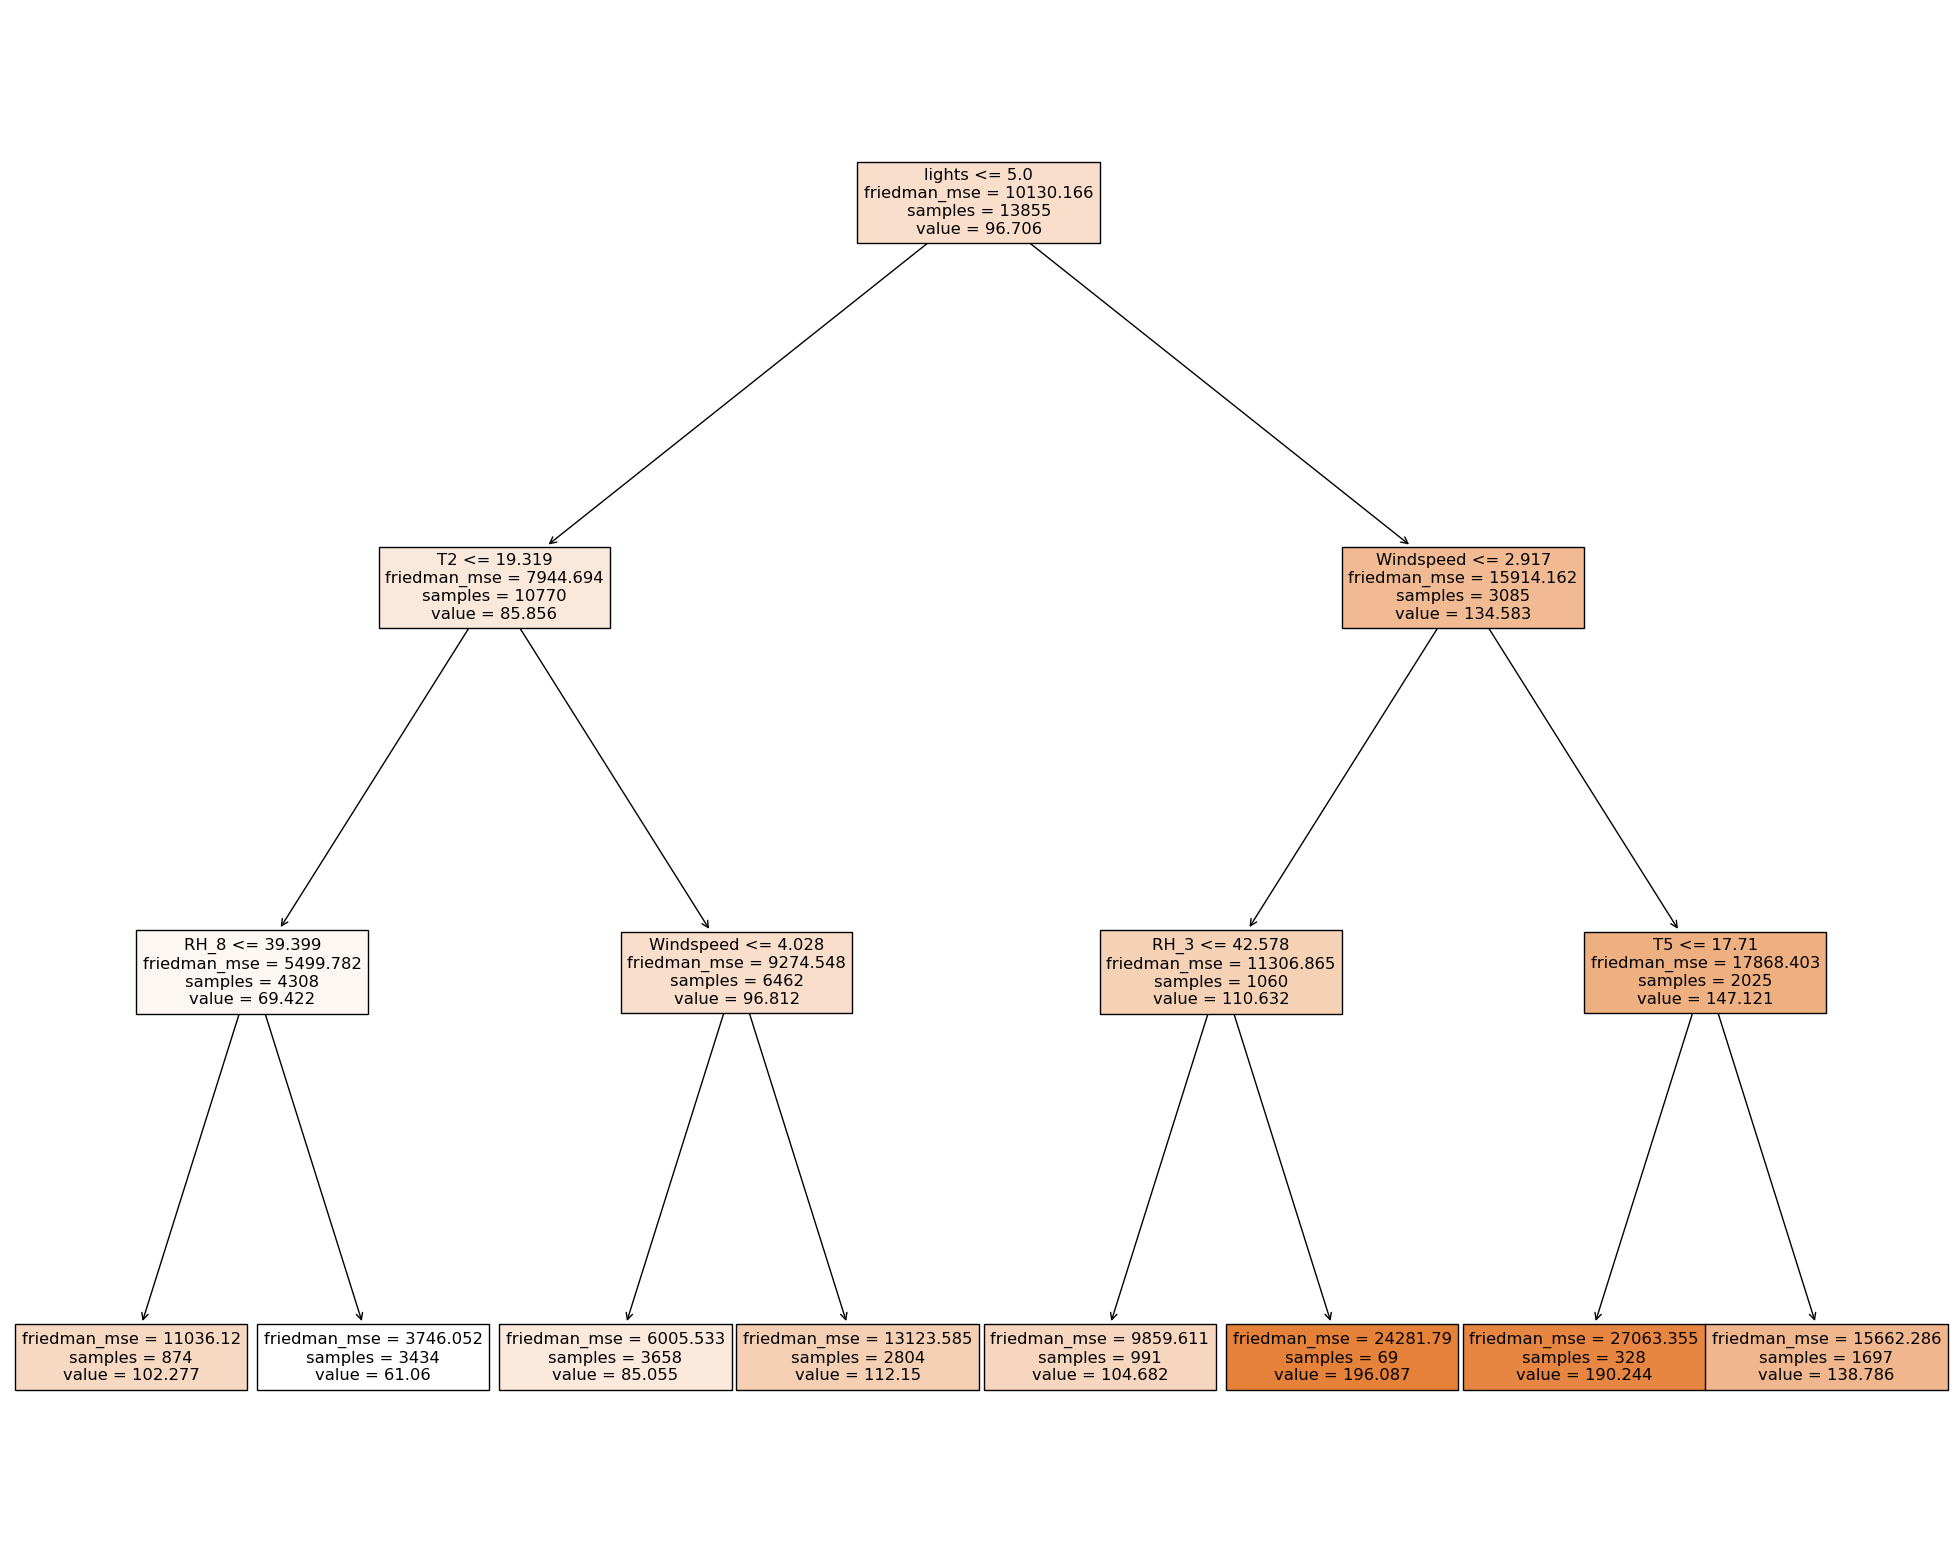

In [39]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_tree_regressor, feature_names=X.columns.to_list(), filled=True)

## PyCaret

In [40]:
pip install pycaret

     ---------------------------------------- 0.0/484.7 kB ? eta -:--:--
     -- ------------------------------------ 30.7/484.7 kB 1.4 MB/s eta 0:00:01
     -------- ----------------------------- 112.6/484.7 kB 1.1 MB/s eta 0:00:01
     --------------- ---------------------- 194.6/484.7 kB 1.3 MB/s eta 0:00:01
     ---------------------- --------------- 286.7/484.7 kB 1.5 MB/s eta 0:00:01
     ------------------------------- ------ 399.4/484.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  481.3/484.7 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 484.7/484.7 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/73.4 kB ? eta -:--:--
     ---------------------------------------- 73.4/73.4 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.3 MB 4.3 MB/s eta 0:00:01
     ------ --------------------------------- 0.2/1.3 MB 3.1 MB/s 

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'D:\\environment\\venv\\Lib\\site-packages\\~cipy.libs\\libopenblas_v0.3.20-571-g3dec11c6-gcc_10_3_0-c2315440d6b6cef5037bad648efc8c59.dll'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from pycaret.utils import version
version()

ModuleNotFoundError: No module named 'pycaret'

In [42]:
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

In [43]:
df_py = pd.read_csv('energy_task.csv')

## CART

In [44]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Errore Quadratico Medio (MSE): 12839.549653579677
Coefficient of Determination (R^2): -0.07523775366934982


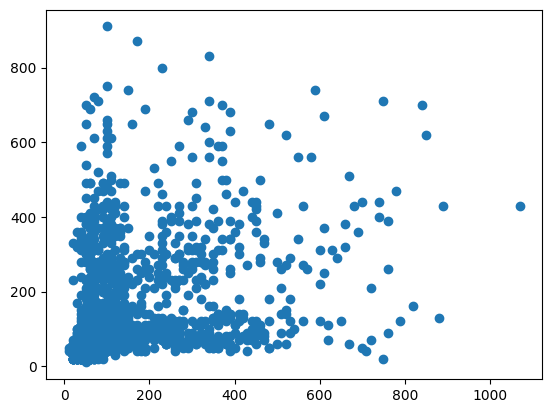

In [45]:
y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Errore Quadratico Medio (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))
plot = tree.plot_tree(tree_regressor, feature_names=X_train.columns.tolist(), filled=True)

## BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
clf = BaggingRegressor(estimator=dtree, n_estimators=10).fit(X_train, y_train)
y_br_pred = clf.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - y_br_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

## GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [ ]:
MSE_test = round(np.mean(np.square(y_test - predict)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

## StackingRegressor

In [ ]:
from sklearn.ensemble import StackingRegressor
clf = StackingRegressor(estimators = [("dtr", dtree)], final_estimator=dtree).fit(X_train, y_train)
y_sc_pred = clf.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - y_sc_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test